In [1]:
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

import numpy as np
import pandas as pd
import datetime

import random
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

## Manipulate the Data

#### Reading and Cleaning Data

In [2]:
df=pd.read_csv('/Users/renfeigao/Desktop/take home/DoorDash/historical_data.csv')
df_test=pd.read_csv('/Users/renfeigao/Desktop/take home/DoorDash/predict_data.csv')

In [3]:
df.describe(include='all')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428,197421,197428.000000,192668,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
unique,NaN,180985,178110,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-02-11 19:50:43,2015-02-16 03:51:49,NaN,american,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,5,NaN,19399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.978706,NaN,NaN,3530.510272,NaN,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,NaN,NaN,2053.496711,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,NaN,NaN,1686.000000,NaN,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,NaN,NaN,3592.000000,NaN,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,NaN,NaN,5299.000000,NaN,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000


In [4]:
df_test.describe(include='all')

,market_id,created_at,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_id,platform
count,54528.000000,54778,54778.000000,53435,54495.000000,54778.000000,54778.000000,54778.000000,54778.000000,54778.000000,50145.000000,50145.000000,50145.000000,54778.000000,54767.000000,54778.000000,54778
unique,NaN,49941,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2015-02-25 03:01:19,NaN,american,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios
freq,NaN,4,NaN,5166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27278
mean,3.031360,NaN,3489.640969,NaN,2.885017,3.227737,2715.758772,2.691902,683.757384,1166.795356,49.076179,43.515206,62.566756,308.112673,547.765406,126118.103454,NaN
std,1.531606,NaN,2050.221801,NaN,1.512087,2.557472,1897.919808,1.650204,538.496995,574.594726,37.594714,34.051339,56.378953,88.937888,220.459715,72683.611935,NaN
min,1.000000,NaN,2.000000,NaN,1.000000,1.000000,0.000000,1.000000,-63.000000,0.000000,-1.000000,-4.000000,-9.000000,0.000000,0.000000,20.000000,NaN
25%,2.000000,NaN,1661.000000,NaN,1.000000,2.000000,1420.000000,2.000000,299.000000,819.000000,19.000000,16.000000,19.000000,251.000000,385.000000,62938.500000,NaN
50%,3.000000,NaN,3518.000000,NaN,3.000000,3.000000,2220.000000,2.000000,595.000000,1095.000000,41.000000,36.000000,45.000000,251.000000,544.000000,126194.000000,NaN
75%,4.000000,NaN,5247.000000,NaN,4.000000,4.000000,3415.000000,3.000000,929.000000,1399.000000,71.000000,63.000000,91.000000,446.000000,703.000000,188916.000000,NaN


#### Target Vriable: Check target variable and delete the outliers, and log-transform the length.
Outliers removal is note always safe. I decided to delete these as they are very huge and really bad.
There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. And some outliers is not real 'outliers', it is just bad situation we need to pay attention to.

3


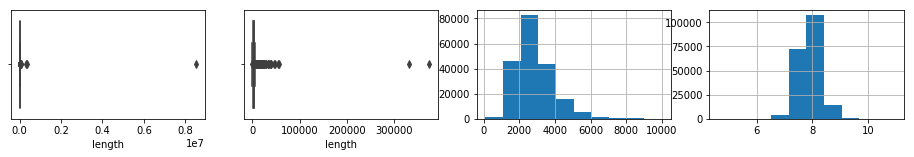

In [5]:
#Since the Delivery time is really important target value, and it only has 7 missing, so just drop these missing.
df1=df.dropna(subset=['actual_delivery_time']).copy()
df1['actual_delivery_time_dt']=pd.to_datetime(df1['actual_delivery_time'])
df1['created_at_dt']=pd.to_datetime(df1['created_at'])
df1['length']=(df1.actual_delivery_time_dt-df1.created_at_dt).astype('timedelta64[s]')
figure(figsize=(16,2))
plt.subplot(1,4,1)
sns.boxplot(x=df1['length'])
plt.subplot(1,4,2)
sns.boxplot(x=df1['length'][df1.length<=500000])
print(len(df1[df1.length>60000]))

#Drop outliers for length
df1=df1[df1.length<=60000]

plt.subplot(1,4,3)
df1[df1.length<=10000].length.hist()
df1['length']=np.log(df1.length)
plt.subplot(1,4,4)
df1['length'].hist()

3


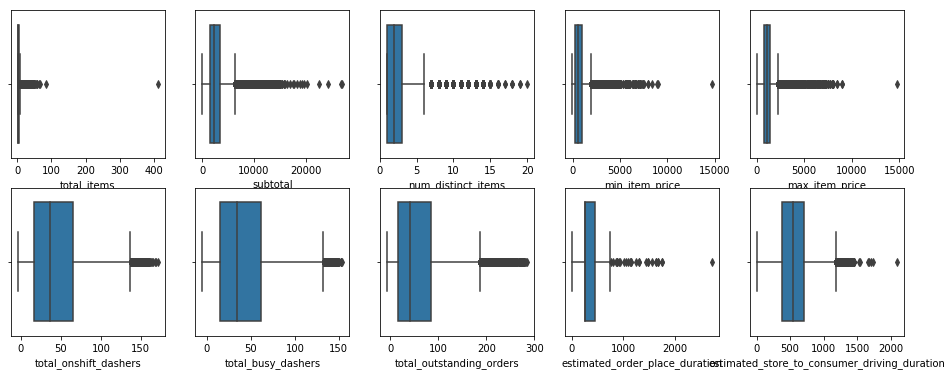

In [6]:
#check some fields with outliers
figure(figsize=(16,6))
outlier_fields=['total_items','subtotal','num_distinct_items','min_item_price','max_item_price',
               'total_onshift_dashers','total_busy_dashers','total_outstanding_orders','estimated_order_place_duration',
               'estimated_store_to_consumer_driving_duration']
for i in range(len(outlier_fields)):
    plt.subplot(2,5,i+1)
    sns.boxplot(x=df1[outlier_fields[i]])
#Some fileds with obviously outliers, drop them.
print(len(df1[(df1.total_items>100)|(df1.min_item_price>10000)|(df1.max_item_price>10000)|(df1.max_item_price>10000)|
       (df1.estimated_order_place_duration>2000)]))
df1=df1[(df1.total_items<=100)&(df1.min_item_price<=10000)&(df1.max_item_price<=10000)&(df1.max_item_price<=10000)&
       (df1.estimated_order_place_duration<=2000)]

In [7]:
#replace the negative value with nan
df1.loc[df1.min_item_price<0,'min_item_price']=np.nan
df1.loc[df1.total_onshift_dashers<0,'total_onshift_dashers']=np.nan
df1.loc[df1.total_busy_dashers<0,'total_busy_dashers']=np.nan
df1.loc[df1.total_outstanding_orders<0,'total_outstanding_orders']=np.nan

In [8]:
#create some date other features
df1['hour']=df1['created_at_dt'].apply(lambda x: x.hour)
df1['weekday']=df1['created_at_dt'].dt.day_name()
df1['created_date']=df1['created_at_dt'].dt.date
df1['day'] = df1['created_at_dt'].dt.day
df1['avg_price']=df1['subtotal'].div(df1['total_items'])
df1.loc[~np.isfinite(df1['avg_price']), 'avg_price'] = 0 

#### Analysis Missing

In [9]:
#show missing rate
(len(df1) - df1.count())/len(df1)

market_id                                       0.005000
created_at                                      0.000000
actual_delivery_time                            0.000000
store_id                                        0.000000
store_primary_category                          0.024112
order_protocol                                  0.005040
total_items                                     0.000000
subtotal                                        0.000000
num_distinct_items                              0.000000
min_item_price                                  0.000066
max_item_price                                  0.000000
total_onshift_dashers                           0.082476
total_busy_dashers                              0.082476
total_outstanding_orders                        0.082593
estimated_order_place_duration                  0.000000
estimated_store_to_consumer_driving_duration    0.002664
actual_delivery_time_dt                         0.000000
created_at_dt                  

In [10]:
#store_primary_category
df1["store_primary_category"]=df1["store_primary_category"].fillna('OTHER')
df1["store_primary_category"]=df1.groupby("store_id")["store_primary_category"].apply(lambda x: x.replace("OTHER",
        x.value_counts().index[0]))
#market_id
df1["market_id"]=df1["market_id"].fillna(-1)
df1["market_id"] =df1.groupby("store_id")["market_id"].apply(lambda x: x.replace(-1,
        x.value_counts().index[0]))
#order_protocol
df1["order_protocol"]=df1["order_protocol"].fillna(-1)
df1["order_protocol"] =df1.groupby("store_id")["order_protocol"].apply(lambda x: x.replace(-1,
        x.value_counts().index[0]))
#estimated_store_to_consumer_driving_duration
df1['estimated_store_to_consumer_driving_duration']=df1['estimated_store_to_consumer_driving_duration'].fillna(
    df1['estimated_store_to_consumer_driving_duration'].median())
df1["min_item_price"]=df1.groupby(['store_id'])["min_item_price"].apply(
    lambda x: x.fillna(x.median()))
df1['estimated_total_duration']=df1['estimated_order_place_duration']+df1['estimated_store_to_consumer_driving_duration']

In [11]:
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
df1['market_id'] = df1['market_id'].astype(int).astype(str)
#df['store_id'] = df['store_id'].astype(str)
df1['order_protocol'] = df1['order_protocol'].astype(str)
df1['hour_str']=df1['hour'].astype(str)
df1.market_id=df1.market_id.map({'1': 'one','2':'two','3':'three','4':'four','5':'five','6':'six','-1':'negtive one'})

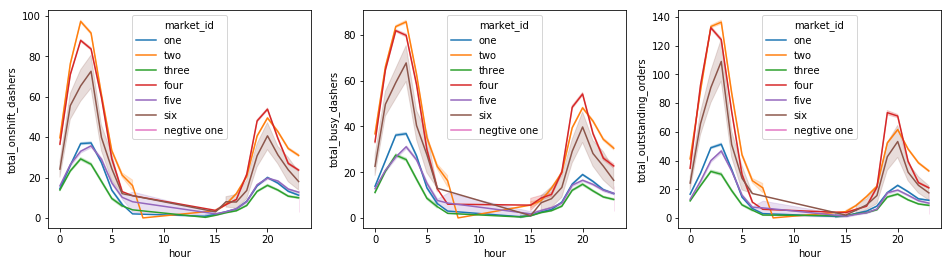

In [12]:
#total_onshift_dashers&total_busy_dashers&total_outstanding_orders
#This part has a big missing ratio,from the chart, the shift dasher is follow by the pattern of hours.
figure(figsize=(16,4))
dasher_fields=['total_onshift_dashers','total_busy_dashers','total_outstanding_orders']
for i in range(len(dasher_fields)):
    plt.subplot(1,3,i+1)
    sns.lineplot(data=df1,x='hour',y=dasher_fields[i],hue='market_id')

In [13]:
df1['busy_driver_ratio']=df1['total_busy_dashers'].div(df1['total_onshift_dashers'])

In [14]:
df1["total_onshift_dashers"]=df1.groupby(["hour",'market_id'])["total_onshift_dashers"].apply(lambda x: x.fillna(x.median()))
df1["busy_driver_ratio"]=df1.groupby(["hour",'market_id'])["busy_driver_ratio"].apply(lambda x: x.fillna(x.median()))
df1["total_busy_dashers"]=df1["total_busy_dashers"].fillna(df1["total_onshift_dashers"]*df1["busy_driver_ratio"])
df1["total_outstanding_orders"]=df1.groupby(["hour",'market_id'])["total_outstanding_orders"].apply(lambda x: x.fillna(x.median()))
df1.loc[~np.isfinite(df1['busy_driver_ratio']), 'busy_driver_ratio'] = 0 

In [15]:
len(df[(df.total_onshift_dashers<df.total_busy_dashers)|(df.total_onshift_dashers.isnull())])/len(df)

0.2869704398565553

The dasher information is bad for about 30%, we may need to drop the columns, because the data for these columns are not good.

In [16]:
df1.describe(include='all')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery_time_dt,created_at_dt,length,hour,weekday,created_date,day,avg_price,estimated_total_duration,hour_str,busy_driver_ratio
count,197415,197415,197415,197415.000000,197415,197415,197415.000000,197415.000000,197415.000000,197415.000000,197415.000000,197411.000000,197411.00000,197411.000000,197415.000000,197415.000000,197415,197415,197415.000000,197415.000000,197415,197415,197415.000000,197415.000000,197415.000000,197415,197415.000000
unique,7,180976,178107,NaN,75,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178107,180976,NaN,NaN,7,29,NaN,NaN,NaN,19,NaN
top,two,2015-02-11 19:50:43,2015-02-16 03:51:49,NaN,american,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-01 03:44:13,2015-02-11 19:50:43,NaN,NaN,Saturday,2015-02-07,NaN,NaN,NaN,2,NaN
freq,55340,6,5,NaN,19520,54987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,6,NaN,NaN,34541,9149,NaN,NaN,NaN,36972,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-21 15:58:11,2015-01-21 15:22:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-18 07:35:20,2015-02-18 06:00:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3530.569567,NaN,NaN,3.194327,2682.262827,2.670780,686.175445,1159.521799,44.527552,41.59209,57.571566,308.548525,545.351463,NaN,NaN,7.891467,8.467437,NaN,NaN,15.296984,975.258877,853.899987,NaN,0.951808
std,NaN,NaN,NaN,2053.496331,NaN,NaN,2.503645,1822.922480,1.630265,521.075529,557.585520,33.655002,31.36756,51.235568,89.977330,219.062300,NaN,NaN,0.363267,8.658820,NaN,NaN,9.201008,516.324473,234.781571,NaN,0.381332
min,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,NaN,4.615121,0.000000,NaN,NaN,1.000000,0.000000,153.000000,NaN,0.000000
25%,NaN,NaN,NaN,1686.000000,NaN,NaN,2.000000,1400.000000,1.000000,299.000000,800.000000,18.000000,16.00000,18.000000,251.000000,383.000000,NaN,NaN,7.651596,2.000000,NaN,NaN,7.000000,647.666667,683.000000,NaN,0.846154


In [17]:
(len(df1) - df1.count())/len(df1)

market_id                                       0.00000
created_at                                      0.00000
actual_delivery_time                            0.00000
store_id                                        0.00000
store_primary_category                          0.00000
order_protocol                                  0.00000
total_items                                     0.00000
subtotal                                        0.00000
num_distinct_items                              0.00000
min_item_price                                  0.00000
max_item_price                                  0.00000
total_onshift_dashers                           0.00002
total_busy_dashers                              0.00002
total_outstanding_orders                        0.00002
estimated_order_place_duration                  0.00000
estimated_store_to_consumer_driving_duration    0.00000
actual_delivery_time_dt                         0.00000
created_at_dt                                   

In [18]:
#For those not available for market id and hours, just fill in 0
df1=df1.fillna(0)

#### Adding log-transformed predictors to raw data

/Users/renfeigao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116baf470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116baf898>]], dtype=object)

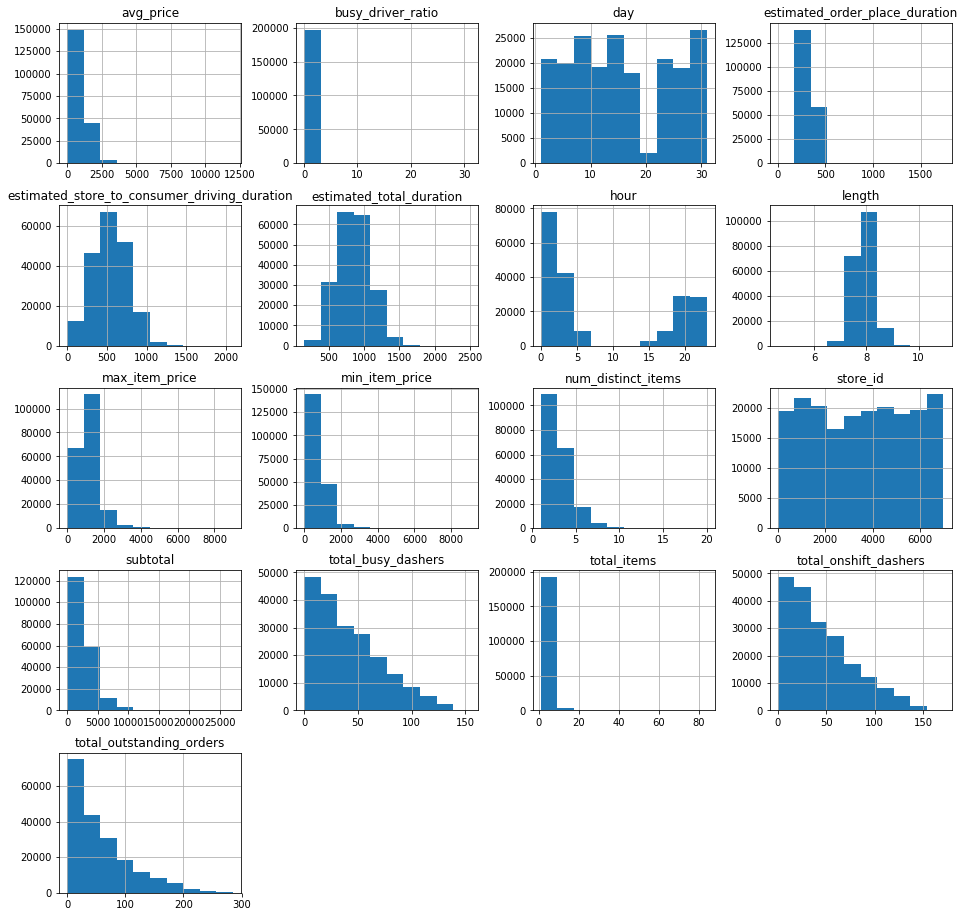

In [19]:
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
df1.hist(ax=ax)

In [20]:
def addlogs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res
loglist = ['total_busy_dashers','total_items','total_onshift_dashers','total_outstanding_orders']

df1 = addlogs(df1, loglist)

#### add squared predictor

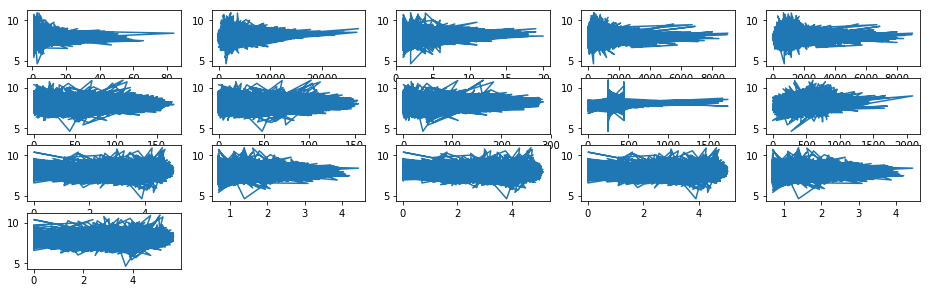

In [21]:
figure(figsize=(16,6))
fields=['total_items','subtotal','num_distinct_items','min_item_price','max_item_price',
               'total_onshift_dashers','total_busy_dashers','total_outstanding_orders','estimated_order_place_duration',
               'estimated_store_to_consumer_driving_duration','total_busy_dashers_log', 'total_items_log',
        'total_onshift_dashers_log','total_busy_dashers_log', 'total_items_log'
        , 'total_outstanding_orders_log']
for i in range(len(fields)):
    plt.subplot(5,5,i+1)
    plt.plot(df1[fields[i]],df1['length'])

In [22]:
#def addSquared(res, ls):
#    m = res.shape[1]
#    for l in ls:
#        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
#        res.columns.values[m] = l + '_sq'
#        m += 1
#    return res 

#sqpredlist = ['estimated_order_place_duration_log','estimated_store_to_consumer_driving_duration_log',
#          'max_item_price_log','min_item_price_log','num_distinct_items_log','subtotal_log','total_busy_dashers_log',
#          'total_items_log','total_onshift_dashers_log','total_outstanding_orders_log']
#df1 = addSquared(df1, sqpredlist)

#### Data Finalize

In [23]:
df_final=df1.drop(columns=['created_at','actual_delivery_time','actual_delivery_time_dt','created_at_dt','created_date',
                          'store_id'])
df_model=pd.get_dummies(df_final,drop_first=True)
#,'total_busy_dashers','total_onshift_dashers','busy_driver_ratio',
#                           'total_onshift_dashers_log','total_busy_dashers_log'

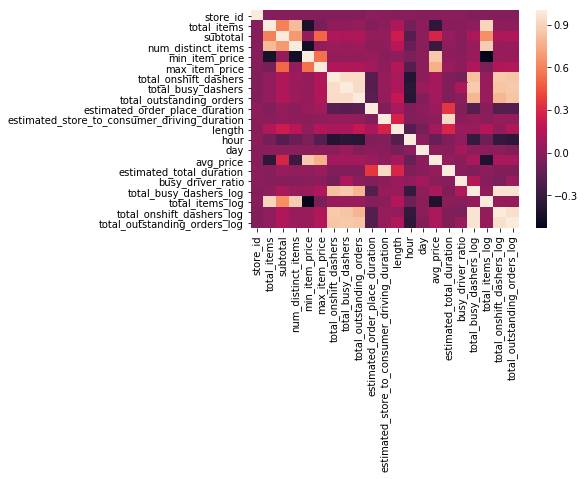

In [24]:
# plot the heatmap
corr = df1.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

#### Model Development
Using four models and stacking all the models finally.

In [25]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(df_model.drop(columns='length'),df_model['length'],test_size=0.3)

In [26]:
###xgboost
xgb = XGBRegressor(learning_rate =0.01, n_estimators=3000, max_depth=5,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)
model=xgb.fit(Xtrain, Ytrain, eval_set=[(Xtrain, Ytrain), (Xtest, Ytest)], 
                eval_metric= 'rmse', verbose= 500, early_stopping_rounds= 200)
pred_test_xgb = model.predict(Xtest)

[0]	validation_0-rmse:7.32598	validation_1-rmse:7.32787
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[500]	validation_0-rmse:0.297475	validation_1-rmse:0.302151
[1000]	validation_0-rmse:0.282915	validation_1-rmse:0.289003
[1500]	validation_0-rmse:0.278029	validation_1-rmse:0.285629
[2000]	validation_0-rmse:0.274858	validation_1-rmse:0.283919
[2500]	validation_0-rmse:0.27241	validation_1-rmse:0.282866
[2999]	validation_0-rmse:0.270371	validation_1-rmse:0.282194


In [27]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = Xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
total_outstanding_orders,0.073122
subtotal,0.063003
day,0.061402
busy_driver_ratio,0.059627
total_onshift_dashers,0.059592
estimated_store_to_consumer_driving_duration,0.052263
max_item_price,0.049647
total_busy_dashers,0.048483
estimated_total_duration,0.047204
min_item_price,0.041534


In [28]:
def grid_get(model,X,y,param_grid):
        grid_search = GridSearchCV(model,param_grid,cv=5, scoring="neg_mean_squared_error",return_train_score=True)
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [29]:
#ridge
l2Regr = Ridge()
grid_get(l2Regr,Xtrain,Ytrain,{'alpha':[5,10,15,20,25,30,35,40,45,50,55]})

{'alpha': 30} 0.295755813619
           params  mean_test_score  std_test_score
0    {'alpha': 5}         0.295770        0.000404
1   {'alpha': 10}         0.295763        0.000404
2   {'alpha': 15}         0.295759        0.000403
3   {'alpha': 20}         0.295757        0.000401
4   {'alpha': 25}         0.295756        0.000400
5   {'alpha': 30}         0.295756        0.000399
6   {'alpha': 35}         0.295756        0.000398
7   {'alpha': 40}         0.295757        0.000397
8   {'alpha': 45}         0.295757        0.000396
9   {'alpha': 50}         0.295758        0.000395
10  {'alpha': 55}         0.295760        0.000394


In [31]:
# lasso
l1Regr = Lasso(alpha = 0.0003, random_state=1, max_iter=50000)
l1Regr.fit(Xtrain, Ytrain)
pred_train_l1 = l1Regr.predict(Xtrain)
pred_test_l1 = l1Regr.predict(Xtest)
    
np.square(pred_test_l1 - Ytest).mean() ** 0.5

0.29805746394737553

In [32]:
# GBR      
myGBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                      max_depth=4, max_features='sqrt',
                                      min_samples_leaf=15, min_samples_split=50,
                                      loss='huber', random_state = 5) 
    
myGBR.fit(Xtrain,Ytrain)
pred_train_GBR = myGBR.predict(Xtrain)
pred_test_GBR = myGBR.predict(Xtest)
np.square(pred_test_GBR - Ytest).mean() ** 0.5

0.2846991056811641

In [34]:
#stacking XGBOOST AND GBR
Xstack=pd.DataFrame(0.5*pred_test_GBR)+pd.DataFrame(0.5*pred_test_xgb)
l1_staked = Lasso(alpha = 0.0001,fit_intercept = True)
l1_staked.fit(Xstack, Ytest)
pred_test_stack = l1_staked.predict(Xstack)

np.square((0.5*pred_test_GBR+0.5*pred_test_xgb) - Ytest).mean() ** 0.5

l1_staked = Lasso(alpha = 0.0001,fit_intercept = True)
l1_staked.fit(Xstack, Ytest)
pred_test_stack = l1_staked.predict(Xstack)
np.square(pred_test_stack - Ytest).mean() ** 0.5
####xgb is better

0.28287291135157294

In [35]:
predict_exp=np.exp(pred_test_xgb)
Ytest_exp=np.exp(Ytest)
(np.square(predict_exp - Ytest_exp).mean() ** 0.5)/60

15.91753806118752

In [36]:
((df1.actual_delivery_time_dt-df1.created_at_dt).astype('timedelta64[s]').mean())/60

47.69259217046999

### Predicting the new data.

In [37]:
df_test['created_at_dt']=pd.to_datetime(df_test['created_at'])
df_test.loc[df_test.min_item_price<0,'min_item_price']=np.nan
df_test.loc[df_test.total_onshift_dashers<0,'total_onshift_dashers']=np.nan
df_test.loc[df_test.total_busy_dashers<0,'total_busy_dashers']=np.nan
df_test.loc[df_test.total_outstanding_orders<0,'total_outstanding_orders']=np.nan
df_test['hour']=df_test['created_at_dt'].apply(lambda x: x.hour)
df_test['weekday']=df_test['created_at_dt'].dt.day_name()
df_test['created_date']=df_test['created_at_dt'].dt.date
df_test['day'] = df_test['created_at_dt'].dt.day
df_test['avg_price']=df_test['subtotal'].div(df_test['total_items'])
df_test.loc[~np.isfinite(df_test['avg_price']), 'avg_price'] = 0 
df_test["store_primary_category"]=df_test["store_primary_category"].fillna('OTHER')
df_test["store_primary_category"]=df_test.groupby("store_id")["store_primary_category"].apply(lambda x: 
                                                                                              x.replace("OTHER",
        x.value_counts().index[0]))
#market_id
df_test["market_id"]=df_test["market_id"].fillna(-1)
df_test["market_id"] =df_test.groupby("store_id")["market_id"].apply(lambda x: x.replace(-1,
        x.value_counts().index[0]))
#order_protocol
df_test["order_protocol"]=df_test["order_protocol"].fillna(-1)
df_test["order_protocol"] =df_test.groupby("store_id")["order_protocol"].apply(lambda x: x.replace(-1,
        x.value_counts().index[0]))
#estimated_store_to_consumer_driving_duration
df_test['estimated_store_to_consumer_driving_duration']=df_test['estimated_store_to_consumer_driving_duration'].fillna(
    df_test['estimated_store_to_consumer_driving_duration'].median())
df_test["min_item_price"]=df_test.groupby(['store_id'])["min_item_price"].apply(
    lambda x: x.fillna(x.median()))
df_test['estimated_total_duration']=df_test['estimated_order_place_duration']+df_test[
    'estimated_store_to_consumer_driving_duration']
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
df_test['market_id'] = df_test['market_id'].astype(int).astype(str)
#df['store_id'] = df['store_id'].astype(str)
df_test['order_protocol'] = df_test['order_protocol'].astype(str)
df_test['hour_str']=df_test['hour'].astype(str)
df_test.market_id=df_test.market_id.map({'1': 'one','2':'two','3':'three','4':'four',
                                         '5':'five','6':'six','-1':'negtive one'})
df_test['busy_driver_ratio']=df_test['total_busy_dashers'].div(df_test['total_onshift_dashers'])
df_test["total_onshift_dashers"]=df_test.groupby(["hour",'market_id'])["total_onshift_dashers"].apply(
    lambda x: x.fillna(x.median()))
df_test["busy_driver_ratio"]=df_test.groupby(["hour",'market_id'])["busy_driver_ratio"].apply(lambda x: 
                                                                                              x.fillna(x.median()))
df_test["total_busy_dashers"]=df_test["total_busy_dashers"].fillna(df_test["total_onshift_dashers"]*df_test[
    "busy_driver_ratio"])
df_test["total_outstanding_orders"]=df_test.groupby(["hour",'market_id'])["total_outstanding_orders"].apply(
    lambda x: x.fillna(x.median()))
df_test.loc[~np.isfinite(df_test['busy_driver_ratio']), 'busy_driver_ratio'] = 0 
df_test=df_test.fillna(0)

df_test = addlogs(df_test, loglist)
df_test_final=df_test.drop(columns=['created_at','created_at_dt','created_date','store_id'])
df_test_model=pd.get_dummies(df_test_final,drop_first=True)

In [38]:
df_test_model=df_test_model.drop(columns=['delivery_id','platform_ios','platform_other'])

In [39]:
df_test_model['hour_8']=0
df_test_model['store_primary_category_belgian']=0
df_test_model['store_primary_category_chocolate']=0
df_test_model['store_primary_category_lebanese']=0

In [40]:
pred_xgb = myGBR.predict(df_test_model)
predict_final=np.exp(pred_xgb)

In [41]:
submit=pd.DataFrame(predict_final,index = df_test.delivery_id,columns=['predicted duration'])
submit.to_csv('/Users/renfeigao/Desktop/take home/DoorDash/submit.csv')

#### Virtualize some variable to give business suggestion.

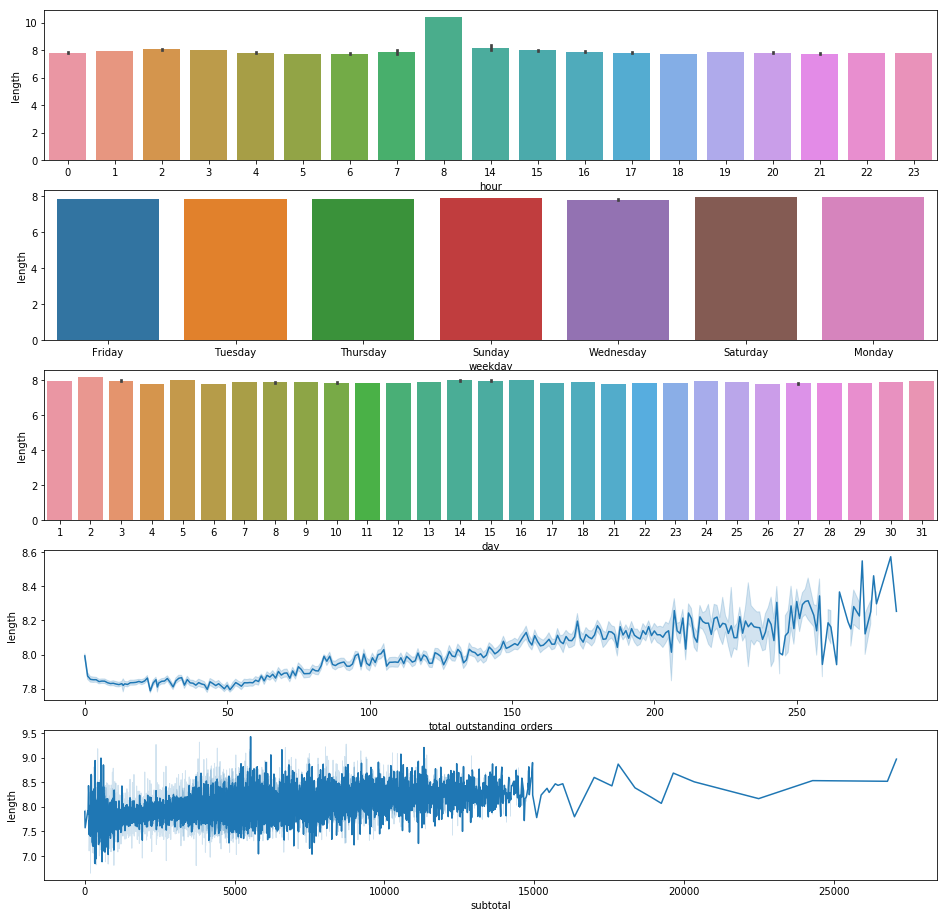

In [42]:
figure(figsize=(16,16))
plt.subplot(5,1,1)
df1hour=df1.copy()
df1hour.hour=df1hour.hour.astype(int)
sns.barplot(data=df1hour,x='hour',y='length')
plt.subplot(5,1,2)
sns.barplot(data=df1,x='weekday',y='length')
plt.subplot(5,1,3)
sns.barplot(data=df1,x='day',y='length')
plt.subplot(5,1,4)
sns.lineplot(data=df_model,x='total_outstanding_orders',y='length')
plt.subplot(5,1,5)
sns.lineplot(data=df_model,x='subtotal',y='length')